# Predict canada's per capita income in year 2020.

## Load Dataset

In [23]:
import pandas as pd
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv"

df = pd.read_csv(url)
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [24]:
df.to_csv("Canada_per_capita_income.csv", index=False)

In [25]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [26]:
df.isna().sum()

year                       0
per capita income (US$)    0
dtype: int64

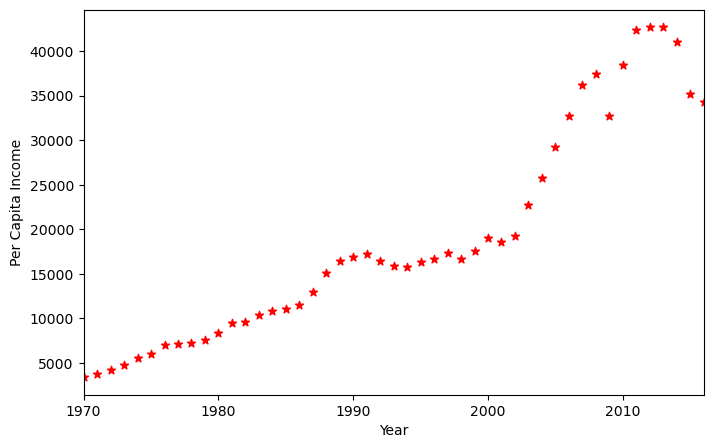

In [27]:
plt.figure(figsize=(8,5))

plt.scatter(df.year, df["per capita income (US$)"], marker="*", color="red")

plt.xlabel("Year")
plt.ylabel("Per Capita Income")
plt.xlim(df.year.min(), df.year.max())

plt.show()


In [28]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(df.drop("per capita income (US$)", axis='columns'), df["per capita income (US$)"], test_size=0.2)

In [29]:
len(x_train)

37

In [30]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


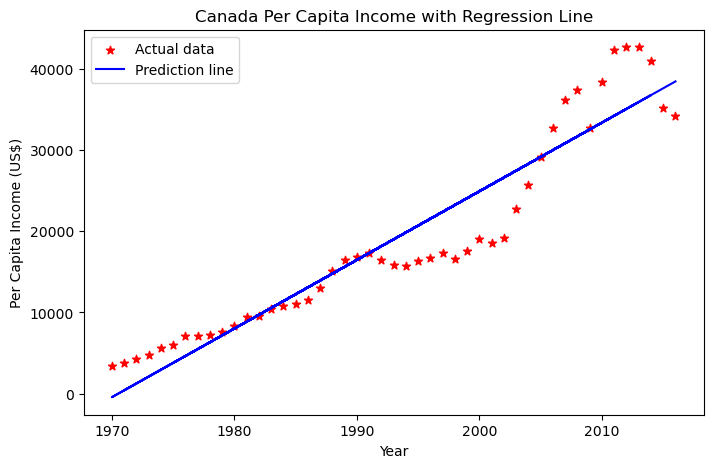

In [32]:
plt.figure(figsize=(8,5))

# scatter plot (actual data)
plt.scatter(
    df.year,
    df["per capita income (US$)"],
    color="red",
    marker="*",
    label="Actual data"
)

# prediction line
plt.plot(
    x_train.year,
    reg_model.predict(x_train),
    color="blue",
    label="Prediction line"
)

plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.title("Canada Per Capita Income with Regression Line")
plt.legend()
plt.show()


In [33]:
reg_model.coef_

array([845.8850953])

In [34]:
reg_model.intercept_

np.float64(-1666839.1901617586)

In [36]:
reg_model.score(x_train, y_train)

0.8867222561029318

In [37]:
reg_model.score(x_test, y_test)

0.8973222836877655

In [41]:
reg_model.predict([[2020]])

/opt/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41848.70235248])

In [42]:
r_model = LinearRegression()
r_model.fit(df[['year']], df["per capita income (US$)"])


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
r_model.score(df[['year']], df["per capita income (US$)"])

0.890916917957032

In [44]:
r_model.predict([[2020]])

/opt/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])